In [2]:
import csv
import pandas as pd

df = pd.read_csv('data/A2_Dataset.csv')

df.head()

,Variant,Sample_ID,Sample_Code,Entry_Date,Origin,Source_Category,Genetic_Group,Intra_Group_Similarity,Inter_Group_Difference,Reference_ID,Genomic_Data,Resistance_Profile,Predicted_Characteristics
0,SQ0227,"""93-6175B"",""SQ0227"",""SRS426868""",PDT000000002.3,2014-01-04 17:03:07+00:00,USA: Western Region,Ecological_Sample,PDS000032687.2,0,NaN,SAMN02147118,NaN,"ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...","antigen_formula=9:g,m:-,serotype=Enteritidis"
1,SQ0228,"""93-2836A"",""SQ0228"",""SRS426867""",PDT000000003.3,2014-01-04 17:03:07+00:00,USA: Western Region,Ecological_Sample,PDS000032687.2,0,NaN,SAMN02147119,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
2,SQ0229,"""93-7741"",""SQ0229"",""SRS426869""",PDT000000004.3,2014-01-04 17:03:07+00:00,USA: Western Region,Ecological_Sample,PDS000065776.23,0,25.0,SAMN02147120,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
3,Gen_001782,"""Gen_001782"",""SRS426891""",PDT000000005.4,2014-01-04 17:03:07+00:00,USA,Ecological_Sample,PDS000150683.10,2,2.0,SAMN02147121,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,Gen_001783,"""Gen_001783"",""SRS426892""",PDT000000006.4,2014-01-04 17:03:07+00:00,USA,Ecological_Sample,PDS000150683.10,2,17.0,SAMN02147122,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"


In [3]:
print("Number of datapoints:",df.shape[0])

Number of datapoints: 419108


#### Sample datapoint reference. We need to convert feature values to usable form for clustering

In [4]:
print("Sample datapoint(1st row):")
print(df.iloc[0])
print("\nResistance_Profile:",df.iloc[0]['Resistance_Profile'])

Sample datapoint(1st row):
Variant                                                                 SQ0227
Sample_ID                                      "93-6175B","SQ0227","SRS426868"
Sample_Code                                                     PDT000000002.3
Entry_Date                                           2014-01-04 17:03:07+00:00
Origin                                                     USA: Western Region
Source_Category                                              Ecological_Sample
Genetic_Group                                                   PDS000032687.2
Intra_Group_Similarity                                                       0
Inter_Group_Difference                                                     NaN
Reference_ID                                                      SAMN02147118
Genomic_Data                                                               NaN
Resistance_Profile           ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...
Predicted_Characteristics

#### Checking for missing values

In [5]:
# check which columns have missing values

df.isnull().sum()

Variant                          0
Sample_ID                       27
Sample_Code                      0
Entry_Date                       0
Origin                           0
Source_Category                  0
Genetic_Group                    0
Intra_Group_Similarity           0
Inter_Group_Difference           2
Reference_ID                     0
Genomic_Data                 48515
Resistance_Profile            8800
Predicted_Characteristics      745
dtype: int64

#### I first dropped all rows with missing values. Then I grouped the columns based on the number of unique values they possess. A categorical feature with a lot of unique values will not be usable for clustering 

In [6]:
df_drop_na_row = df.dropna()

print("Total datapoints in the dataset without missing values:",df_drop_na_row.shape[0])
print("\nA lot of unique values in these columns:")
print("Variant:",df_drop_na_row['Variant'].nunique())
print("Sample_ID:",df_drop_na_row['Sample_ID'].nunique())
print("Sample_Code:",df_drop_na_row['Sample_Code'].nunique())
print("Entry_Date:",df_drop_na_row['Entry_Date'].nunique())
print("Reference_ID:",df_drop_na_row['Reference_ID'].nunique())

print("\nMore common values in these columns:")
print("Origin:",df_drop_na_row['Origin'].nunique())
print("Source_Category:",df_drop_na_row['Source_Category'].nunique())
print("Intra_Group_Similarity:",df_drop_na_row['Intra_Group_Similarity'].nunique())
print("Inter_Group_Difference:",df_drop_na_row['Inter_Group_Difference'].nunique())
print("Predicted_Characteristics:",df_drop_na_row['Predicted_Characteristics'].nunique())

print("\nMore unique values than the above group, but lesser than the first:")
print("Genetic_Group:",df_drop_na_row['Genetic_Group'].nunique())
print("Genomic_Data:",df_drop_na_row['Genomic_Data'].nunique(),"(Has a lot of unique values because it's in float, but we'll check if we can still use it for distance comparison)")
print("Resistance_Profile:",df_drop_na_row['Resistance_Profile'].nunique())

Total datapoints in the dataset without missing values: 362302

A lot of unique values in these columns:
Variant: 360044
Sample_ID: 362221
Sample_Code: 362302
Entry_Date: 127587
Reference_ID: 362272

More common values in these columns:
Origin: 831
Source_Category: 2
Intra_Group_Similarity: 80
Inter_Group_Difference: 99
Predicted_Characteristics: 917

More unique values than the above group, but lesser than the first:
Genetic_Group: 20584
Genomic_Data: 362302 (Has a lot of unique values because it's in float, but we'll check if we can still use it for distance comparison)
Resistance_Profile: 12395


In [7]:
df_drop_na_row.iloc[0]

Variant                                                       Gen_001782
Sample_ID                                       "Gen_001782","SRS426891"
Sample_Code                                               PDT000000005.4
Entry_Date                                     2014-01-04 17:03:07+00:00
Origin                                                               USA
Source_Category                                        Ecological_Sample
Genetic_Group                                            PDS000150683.10
Intra_Group_Similarity                                                 2
Inter_Group_Difference                                               2.0
Reference_ID                                                SAMN02147121
Genomic_Data                                             GCA_010121905.1
Resistance_Profile            fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE
Predicted_Characteristics    antigen_formula=4:r:1,2,serotype=Heidelberg
Name: 3, dtype: object

#### Feature Columns and Removing Sample Specific Columns

In [8]:
print("\nFeature Columns:")
print(df_drop_na_row.columns)
print(len(df_drop_na_row.columns))

filtered_df = df_drop_na_row.drop(['Variant','Entry_Date','Sample_Code','Sample_ID','Reference_ID'], axis=1)
print("\nRemoving columns with feature values unique to samples:")
print(filtered_df.columns)
print(len(filtered_df.columns))


Feature Columns:
Index(['Variant', 'Sample_ID', 'Sample_Code', 'Entry_Date', 'Origin',
       'Source_Category', 'Genetic_Group', 'Intra_Group_Similarity',
       'Inter_Group_Difference', 'Reference_ID', 'Genomic_Data',
       'Resistance_Profile', 'Predicted_Characteristics'],
      dtype='object')
13

Removing columns with feature values unique to samples:
Index(['Origin', 'Source_Category', 'Genetic_Group', 'Intra_Group_Similarity',
       'Inter_Group_Difference', 'Genomic_Data', 'Resistance_Profile',
       'Predicted_Characteristics'],
      dtype='object')
8


### 1. For my first clustering, I assume that the genetic 'comparison' done using Genetic_Group has some ordinal relation. So I use the feature to categorize distance between points as I would for a numerical feature (in my second clustering I assume that such a comparison cannot be made).

#### I observed that all Genetic Group values start with PDS00. 

In [9]:
# first check if all df['Genetic_Group'] start with 'PD00'
print("Do all rows in Genetic_Group column have prefix PDS00:",filtered_df['Genetic_Group'].str.startswith('PDS000').all())
df1 = filtered_df.copy()
print("Removing prefix PDS000 from Genetic_Group column")
df1['Genetic_Group'] = filtered_df['Genetic_Group'].str.replace('PDS000', '')
# convert the string to float
df1['Genetic_Group'] = df1['Genetic_Group'].astype(float)
df1.head()

Do all rows in Genetic_Group column have prefix PDS00: True
Removing prefix PDS000 from Genetic_Group column


,Origin,Source_Category,Genetic_Group,Intra_Group_Similarity,Inter_Group_Difference,Genomic_Data,Resistance_Profile,Predicted_Characteristics
3,USA,Ecological_Sample,150683.10,2,2.0,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,USA,Ecological_Sample,150683.10,2,17.0,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"
5,USA,Ecological_Sample,117418.71,4,35.0,GCA_010121925.1,"aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=C...","antigen_formula=8:i:z6,serotype=Kentucky"
7,USA:AR,Ecological_Sample,74582.10,30,45.0,GCA_011454395.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
8,USA:MD,Ecological_Sample,32329.10,0,45.0,GCA_011455415.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=-:-:-,serotype=I -:-:-"


#### Okay now our data is ready to visualizations before clustering and dimensionality reduction(if required)

First, let's check if any feature gives us good buckets of values for clustering. We can do this by taking each feature in pair with other features

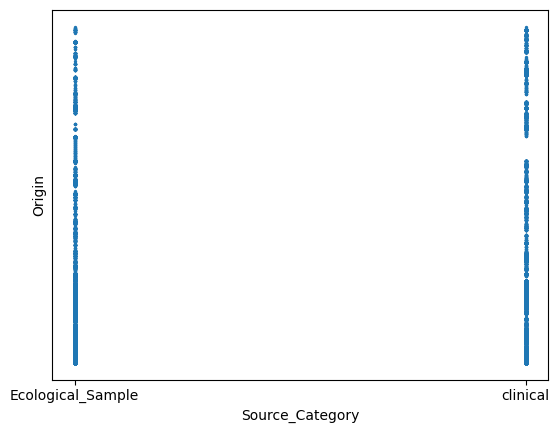

In [10]:
import matplotlib.pyplot as plt
import numpy as np

common_features = ['Source_Category','Origin','Intra_Group_Similarity','Inter_Group_Difference','Predicted_Characteristics']

plt.scatter(df1[common_features[0]].values,df1[common_features[1]].values,s=2)
plt.xlabel(common_features[0])
plt.ylabel(common_features[1])
plt.yticks([])
plt.show()

'Source_Category', since it has only 2 will give us only two buckets. We will have to check how much influence does it have on the clustering since it has only 2 values

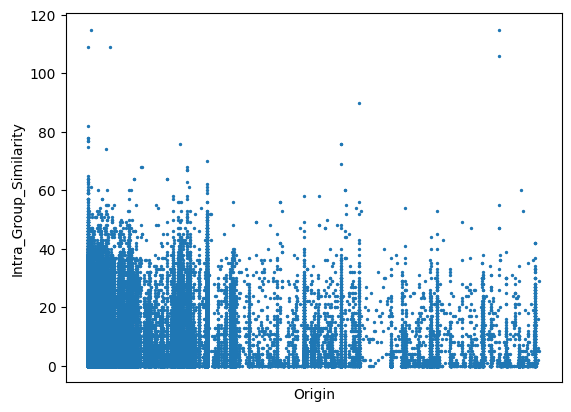

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df1[common_features[1]].values,df1[common_features[2]].values,s=2)
plt.xlabel(common_features[1])
plt.ylabel(common_features[2])
plt.xticks([])
plt.show()

Origin is bucketing values to an extent

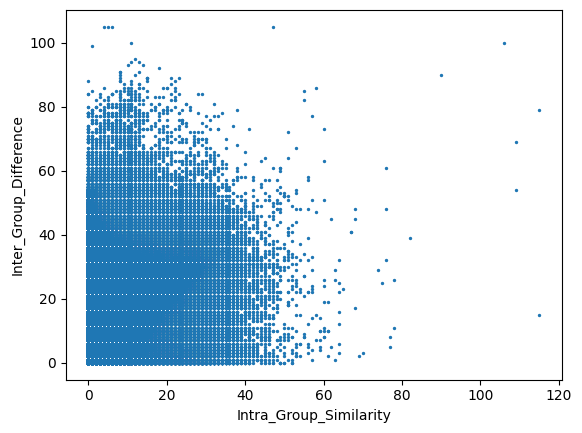

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df1[common_features[2]].values,df1[common_features[3]].values,s=2)
plt.xlabel(common_features[2])
plt.ylabel(common_features[3])
plt.show()

Not much can be interpreted here, will have to plot them with other features. There is some bucketing by both, but it is very fine grained

Intra_Group_Similarity
Inter_Group_Difference
Predicted_Characteristics


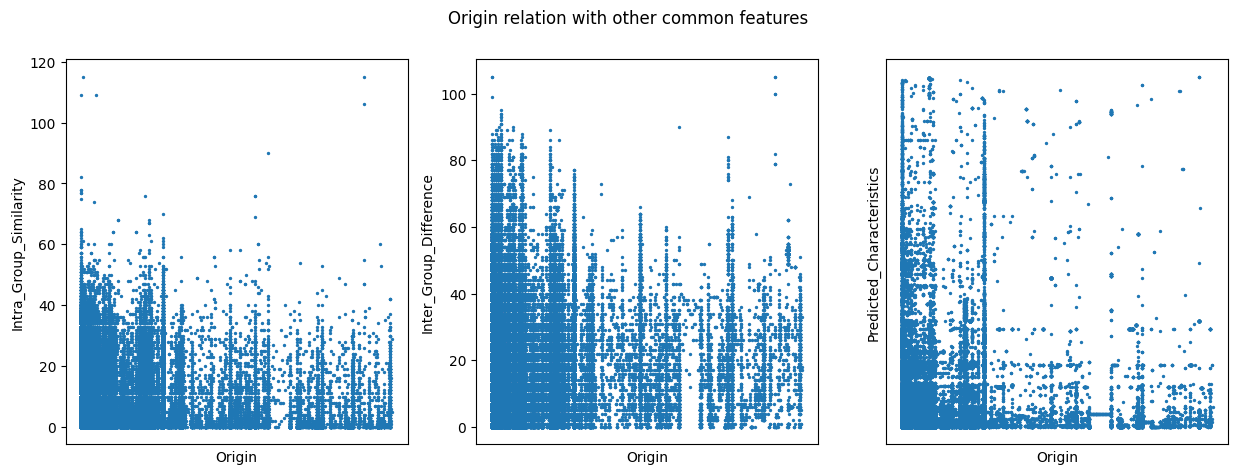

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Origin relation with other common features')
common_features_remsource = common_features.copy()
common_features_remsource.remove('Source_Category') 
for i in range(1,len(common_features_remsource)):
    print(common_features_remsource[i])
    axs[i-1].scatter(df1['Origin'].values,df1[common_features_remsource[i]].values,s=2)
    axs[i-1].set_xlabel('Origin')
    axs[i-1].set_ylabel(common_features_remsource[i])
    axs[i-1].set_xticks([])
    if (type(df1[common_features_remsource[i]].iloc[0]) == str):
        axs[i-1].set_yticks([])
plt.show()

Till now, just 'Origin' is providing a decent amount of bucketing

Let's try taking other features as the plot bases

Origin
Inter_Group_Difference
Predicted_Characteristics


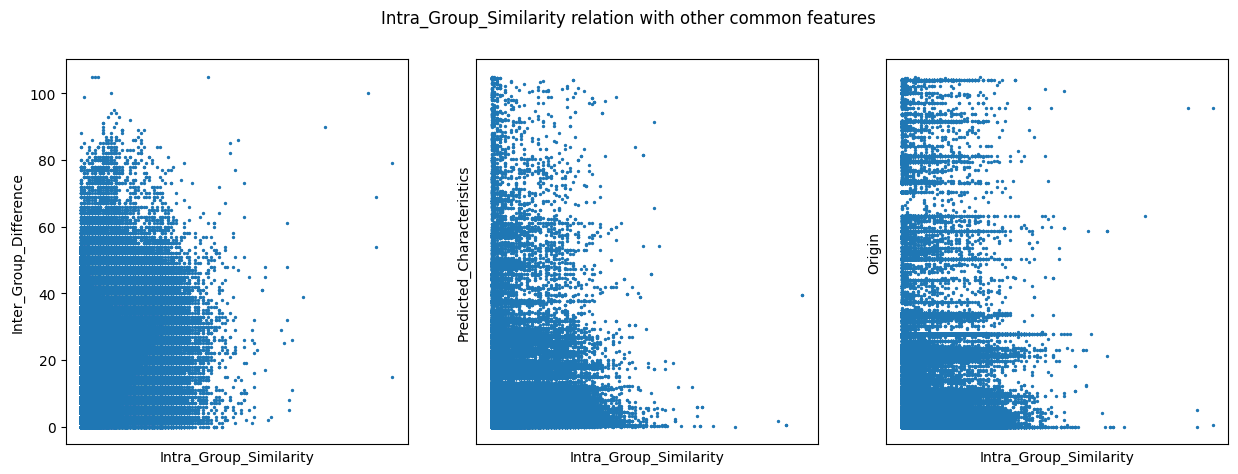

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
common_features_remsource = common_features.copy()
common_features_remsource.remove('Source_Category') 
cur_feature = common_features_remsource[1]
fig.suptitle(f'{cur_feature} relation with other common features')
common_features_remsource.remove(cur_feature)
for i in range(len(common_features_remsource)):
    print(common_features_remsource[i])
    axs[i-1].scatter(df1[cur_feature].values,df1[common_features_remsource[i]].values,s=2)
    axs[i-1].set_xlabel(cur_feature)
    axs[i-1].set_ylabel(common_features_remsource[i])
    axs[i-1].set_xticks([])
    if (type(df1[common_features_remsource[i]].iloc[0]) == str):
        axs[i-1].set_yticks([])
plt.show()

Inter_Group_Similarity does not provide good bucketing alone. All values seem skewed to less than half of its maximum value

Origin
Intra_Group_Similarity
Predicted_Characteristics


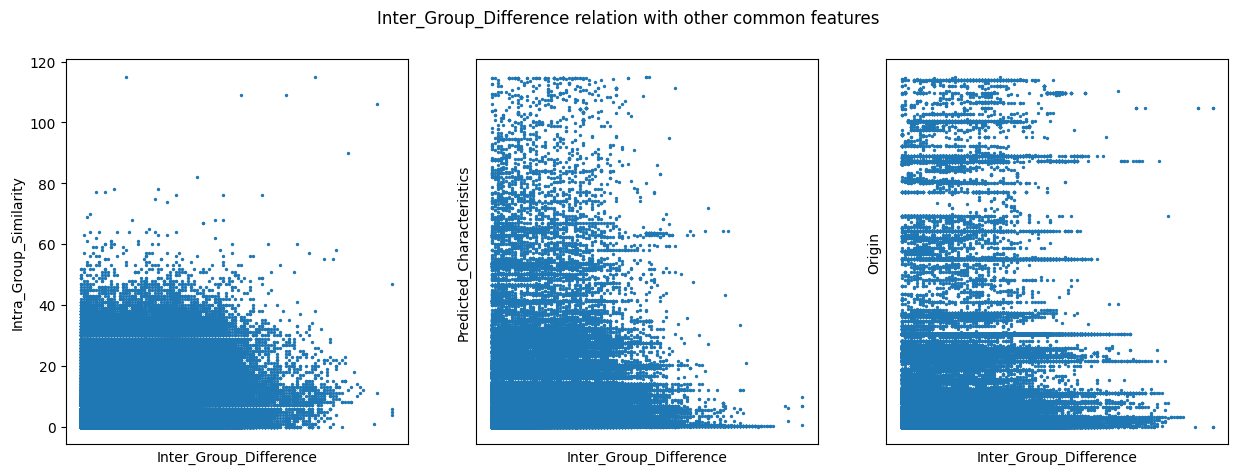

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
common_features_remsource = common_features.copy()
common_features_remsource.remove('Source_Category') 
cur_feature = common_features_remsource[2]
fig.suptitle(f'{cur_feature} relation with other common features')
common_features_remsource.remove(cur_feature)
for i in range(len(common_features_remsource)):
    print(common_features_remsource[i])
    axs[i-1].scatter(df1[cur_feature].values,df1[common_features_remsource[i]].values,s=2)
    axs[i-1].set_xlabel(cur_feature)
    axs[i-1].set_ylabel(common_features_remsource[i])
    axs[i-1].set_xticks([])
    if (type(df1[common_features_remsource[i]].iloc[0]) == str):
        axs[i-1].set_yticks([])
plt.show()

Inter_Group_Difference, does not provide decent bucketing either - similar to Intra_Group_Similarity with a larger range of values

Origin
Intra_Group_Similarity
Inter_Group_Difference


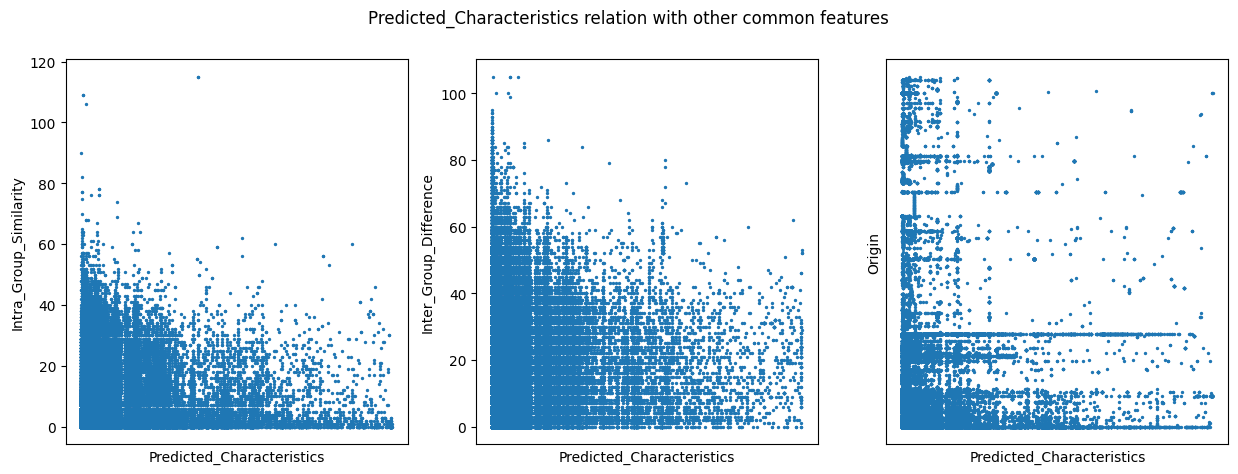

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
common_features_remsource = common_features.copy()
common_features_remsource.remove('Source_Category') 
cur_feature = common_features_remsource[3]
fig.suptitle(f'{cur_feature} relation with other common features')
common_features_remsource.remove(cur_feature)
for i in range(len(common_features_remsource)):
    print(common_features_remsource[i])
    axs[i-1].scatter(df1[cur_feature].values,df1[common_features_remsource[i]].values,s=2)
    axs[i-1].set_xlabel(cur_feature)
    axs[i-1].set_ylabel(common_features_remsource[i])
    axs[i-1].set_xticks([])
    if (type(df1[common_features_remsource[i]].iloc[0]) == str):
        axs[i-1].set_yticks([])
plt.show()

From the common valued features, just 'Origin' seems to give a decent amount of bucketing

#### Plots for remaining features from the more uniquely valued group

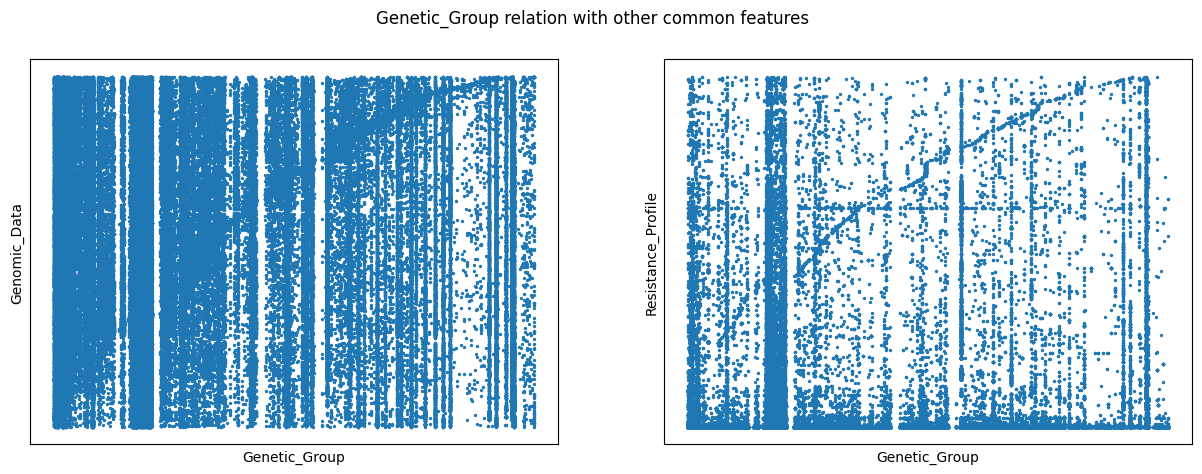

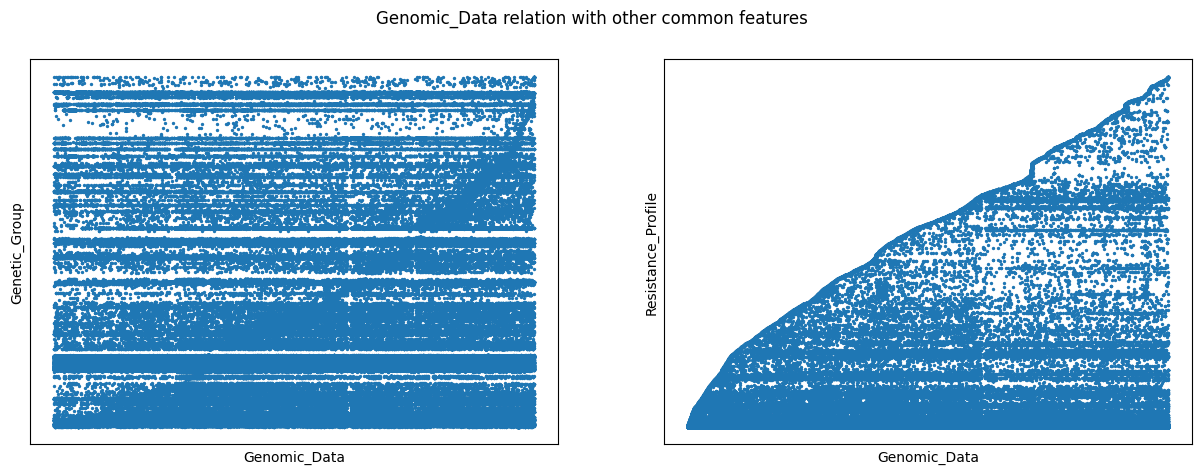

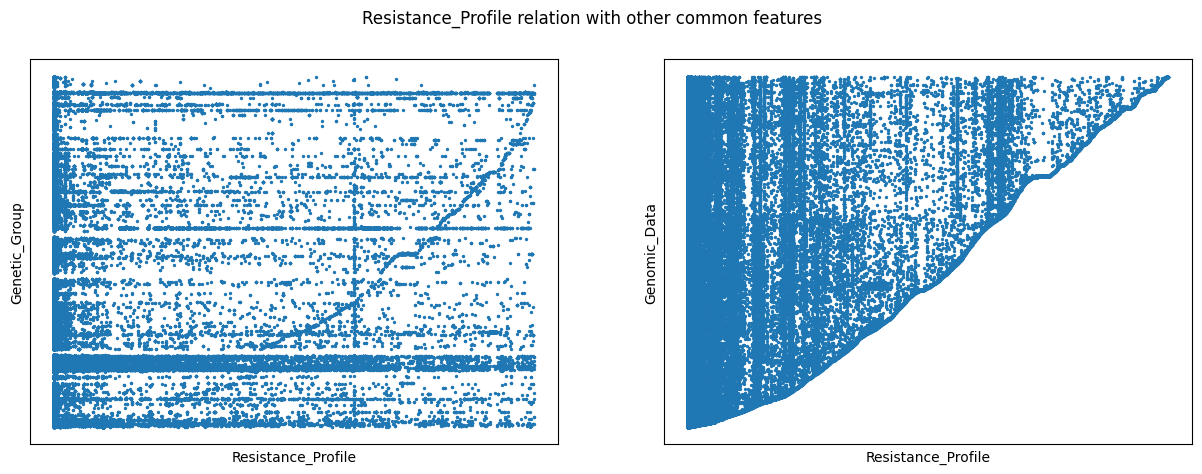

In [17]:
more_uniquely_valued = ['Genetic_Group','Genomic_Data','Resistance_Profile']
for cur_feature in more_uniquely_valued:
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    cur_features = more_uniquely_valued.copy()
    fig.suptitle(f'{cur_feature} relation with other common features')
    cur_features.remove(cur_feature)
    for i,another_feature in enumerate(cur_features):
        if df1[another_feature].dtype == 'float64':
            df1[another_feature] = df1[another_feature].astype(int)
        axs[i].scatter(df1[cur_feature].values,df1[another_feature].values,s=2)
        axs[i].set_xlabel(cur_feature)
        axs[i].set_ylabel(another_feature)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.show()

From these, just 'Genetic_Group' seems to provide a decent amount of bucketing

#### Let's check if we can obtain better buckets in terms of variation of the feature values after standardizing the numeric features

In [18]:
columns = df1.columns
# which columns are numerical
print(df1[columns].dtypes)
numeric_cols = [col for col in columns if df1[col].dtype in ['int64','float64']]

for feature_col in numeric_cols:
    df1[feature_col] = (df1[feature_col] - df1[feature_col].mean())/df1[feature_col].std()

df1.head()

Origin                        object
Source_Category               object
Genetic_Group                  int64
Intra_Group_Similarity         int64
Inter_Group_Difference       float64
Genomic_Data                  object
Resistance_Profile            object
Predicted_Characteristics     object
dtype: object


,Origin,Source_Category,Genetic_Group,Intra_Group_Similarity,Inter_Group_Difference,Genomic_Data,Resistance_Profile,Predicted_Characteristics
3,USA,Ecological_Sample,2.409822,-0.480255,-0.991398,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,USA,Ecological_Sample,2.409822,-0.480255,0.161395,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"
5,USA,Ecological_Sample,1.610006,-0.228583,1.544746,GCA_010121925.1,"aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=C...","antigen_formula=8:i:z6,serotype=Kentucky"
7,USA:AR,Ecological_Sample,0.580066,3.043152,2.313274,GCA_011454395.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
8,USA:MD,Ecological_Sample,-0.435856,-0.731927,2.313274,GCA_011455415.1,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=-:-:-,serotype=I -:-:-"


Numeric Features: ['Genetic_Group', 'Intra_Group_Similarity', 'Inter_Group_Difference']


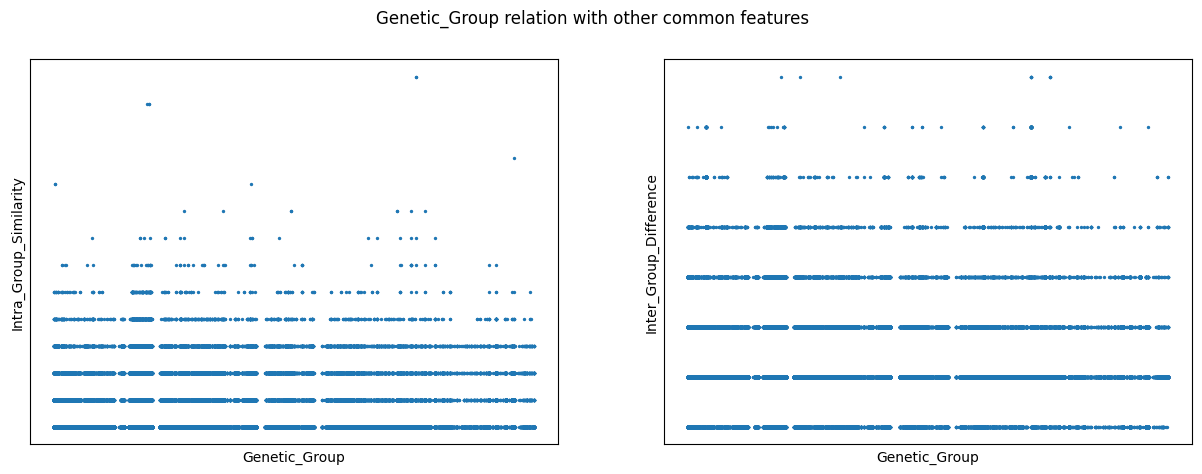

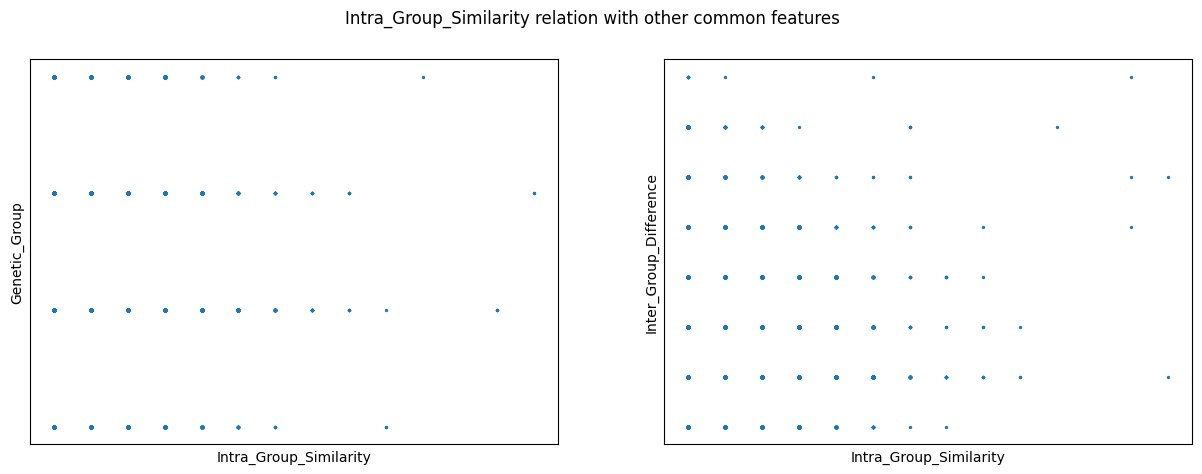

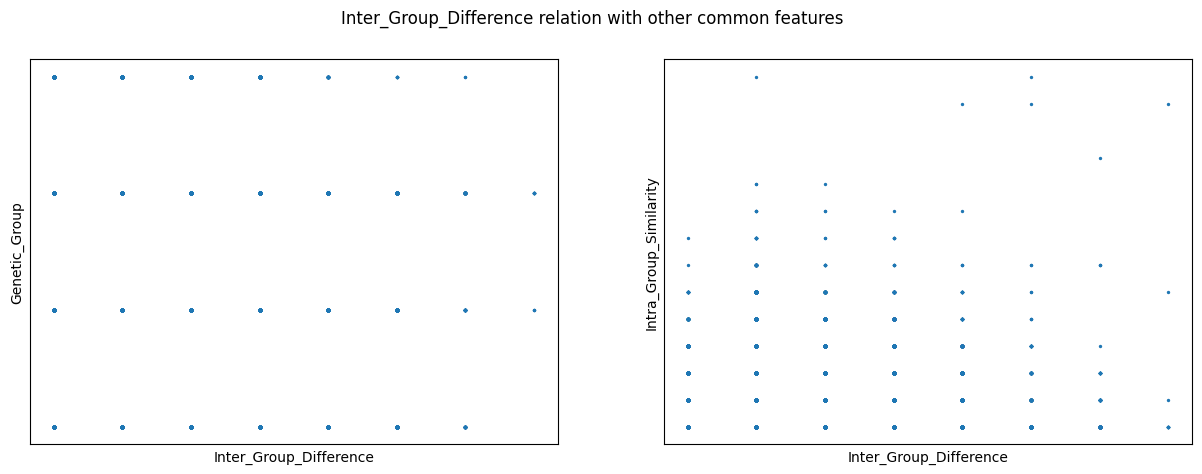

In [19]:
print('Numeric Features:',numeric_cols)
for cur_feature in numeric_cols:
    fig, axs = plt.subplots(1, len(numeric_cols)-1, figsize=(15,5))
    cur_features = numeric_cols.copy()
    fig.suptitle(f'{cur_feature} relation with other common features')
    cur_features.remove(cur_feature)
    for i,another_feature in enumerate(cur_features):
        if df1[another_feature].dtype == 'float64':
            df1[another_feature] = df1[another_feature].astype(int)
        axs[i].scatter(df1[cur_feature].values,df1[another_feature].values,s=2)
        axs[i].set_xlabel(cur_feature)
        axs[i].set_ylabel(another_feature)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.show()


Using variation instead of raw feature values is giving us much better buckets for numeric features

For analyzing clusters, these are still too many combinations to be used separately.

So let's check if doing PCA/SVD for numeric columns is feasible without compromising much on the variation in our dataset.

Correlation Matrix for Numeric Features:
                        Genetic_Group  Intra_Group_Similarity  \
Genetic_Group                1.000000                0.011473   
Intra_Group_Similarity       0.011473                1.000000   
Inter_Group_Difference      -0.003669                0.170151   

                        Inter_Group_Difference  
Genetic_Group                        -0.003669  
Intra_Group_Similarity                0.170151  
Inter_Group_Difference                1.000000  
Eigenvalues corresponding to eigenvectors: [(np.float64(1.1703303817144695), array([[-0.70500394, -0.06719672,  0.70601278]])), (np.float64(1.000492299596944), array([[0.70643634, 0.02131464, 0.70745557]])), (np.float64(0.8291773186885857), array([[-0.0625871 ,  0.99751205,  0.0324433 ]]))]
Proportion of variance explained by each principal component: [0.39011013 0.33349743 0.27639244]


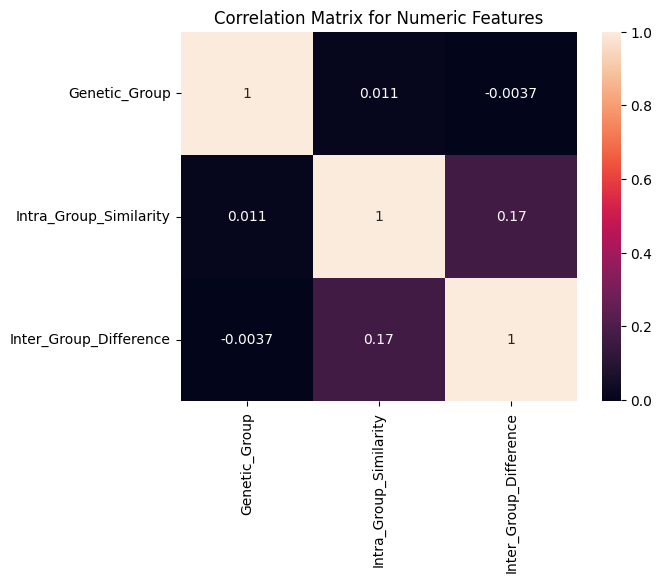

In [20]:
import seaborn as sns
import numpy as np

print("Correlation Matrix for Numeric Features:")
print(df1[numeric_cols].corr())
# eigenvalues corresponding to each eignvector
eigenvalues, eigenvectors = np.linalg.eig(df1[numeric_cols].corr())
# sort the eigenvalues in descending order
eigenvalues_sorted = sorted(eigenvalues,reverse=True)
print("Eigenvalues corresponding to eigenvectors:",[(eig,eigenvectors[np.where(eigenvalues == eig)]) for eig in eigenvalues_sorted])
print("Proportion of variance explained by each principal component:",eigenvalues_sorted/np.sum(eigenvalues_sorted))
sns.heatmap(df1[numeric_cols].corr(),annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

It appears just 'Inter_Group_Similarity' and 'Inter_Group_Difference' have >0.1 correlation, which is still not significant enough (< 0.3) for the two features to be represented by a single principal component

### K-Means Implementation

In [21]:
import matplotlib.pyplot as plt
import time

class KMeans():
    def __init__(self,data,num_clusters=4,num_iterations=5):
        self.num_clusters = num_clusters
        self.num_iterations = num_iterations
        self.centroids = [None]*self.num_clusters
        self.clusters = [[] for i in range(self.num_clusters)]
        self.converged = False
    
    def random_centroids(self,data):
        self.centroids = data.sample(n=self.num_clusters,random_state=1)
        self.centroids = self.centroids.values.astype(float)
    
    def euclidean_distance(self,datapt1,datapt2):
        return np.sqrt(np.sum([np.square(datapt1[i]-datapt2[i]) for i in range(len(datapt1))]))

    def assign(self,data):
        # clear all clusters before reassigning the points:
        self.clusters = [[] for clst in range(self.num_clusters)]

        # find the closest cluster centroid for each datapoint and assign it that cluster
        for datapt in data.values:
            # compute distance from each cluster centroid
            distances = np.array([self.euclidean_distance(datapt,centroid) for centroid in self.centroids])
            # assign the datapoint the cluster with the nearest centroid
            self.clusters[np.argmin(distances)].append(datapt)

    def update(self,data):
        print("Updating centroids")
        # update the centroids for each cluster
        for index,cluster in enumerate(self.clusters):
            if len(cluster) != 0:
                self.centroids[index] = np.mean(cluster,axis=0)
        # find the closest cluster datapoint to the mean of the cluster and update the cluster centroid with that datapoint
        # for index,cluster in enumerate(self.clusters):
        #     if len(cluster) != 0:
        #         min_dst_datapt_index = np.argmin([self.euclidean_distance(self.centroids[index],datapt) for datapt in cluster])
        #         self.centroids[index] = cluster[min_dst_datapt_index]
    
    def iterate(self,data):
        self.random_centroids(data)
        print(f"Initialized Centroids: {self.centroids}")
        for i in range(self.num_iterations):
            print(f"Iteration: {i}")
            self.assign(data)
            self.update(data)
            print("Datapoints per cluster:",[len(cluster) for cluster in self.clusters])
            print("Centroids:",self.centroids)

    def plot(self,axis1,axis2):
        for index,cluster in enumerate(self.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(numeric_cols[axis1])
        plt.ylabel(numeric_cols[axis2])
        plt.legend()
        plt.show()
    
    def wcss(self,data):
        wcss = 0
        for index, cluster in enumerate(self.clusters):
            wcss += np.sum([np.square(self.euclidean_distance(datapt,self.centroids[index])) for datapt in cluster])

        return wcss

print(f"Features: {numeric_cols}")
print("Total datapoints:",df1.shape[0])

num_clusters = 4
num_iterations = 5
print("Number of clusters:",num_clusters)
print("Number of iterations:",num_iterations)

start = time.time()
kmeans = KMeans(df1[numeric_cols],num_clusters,num_iterations)

kmeans.iterate(df1[numeric_cols])
print("Runtime:",time.time() - start)

Features: ['Genetic_Group', 'Intra_Group_Similarity', 'Inter_Group_Difference']
Total datapoints: 362302
Number of clusters: 4
Number of iterations: 5
Initialized Centroids: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]]
Iteration: 0
Updating centroids
Datapoints per cluster: [319357, 0, 42945, 0]
Centroids: [[ 0.09682894  0.07350708 -0.02731739]
 [ 0.          0.          0.        ]
 [ 0.10958202  1.48708814  1.15270695]
 [ 0.          0.          0.        ]]
Iteration: 1
Updating centroids
Datapoints per cluster: [98696, 220661, 42945, 0]
Centroids: [[ 0.76118586  0.21021115 -0.33003364]
 [-0.20032085  0.01236286  0.10807981]
 [ 0.10958202  1.48708814  1.15270695]
 [ 0.          0.          0.        ]]
Iteration: 2
Updating centroids
Datapoints per cluster: [54541, 68457, 42392, 196912]
Centroids: [[ 1.3983792   0.12927889 -0.04820227]
 [-0.64624509  0.0409308   0.34783879]
 [ 0.08492168  1.47997264  1.16816852]
 [ 0.          0.07488624 -0.15197144]]
Iteration: 3
Updating centr

### Computing the optimal number of clusters using the elbow method:

In [22]:
print(f"Features: {numeric_cols}")


num_iterations = 5
wcss = []
for num_clusters in range(2,8):
    print("Number of clusters:",num_clusters)
    print("Number of iterations:",num_iterations)
    start = time.time()
    kmeans = KMeans(df1[numeric_cols],num_clusters=num_clusters,num_iterations=num_iterations)
    kmeans.iterate(data=df1[numeric_cols])
    print("Runtime:",time.time() - start)
    wcss += [kmeans.wcss(df1[numeric_cols])]


Features: ['Genetic_Group', 'Intra_Group_Similarity', 'Inter_Group_Difference']
Number of clusters: 2
Number of iterations: 5
Initialized Centroids: [[0. 0. 0.]
 [0. 0. 0.]]
Iteration: 0
Updating centroids
Datapoints per cluster: [362302, 0]
Centroids: [[0.09834061 0.24106408 0.11255527]
 [0.         0.         0.        ]]
Iteration: 1
Updating centroids
Datapoints per cluster: [134129, 228173]
Centroids: [[ 5.42134811e-01  6.50612470e-01  5.63129525e-01]
 [-1.62538951e-01  3.15550043e-04 -1.52309870e-01]]
Iteration: 2
Updating centroids
Datapoints per cluster: [130607, 231695]
Centroids: [[ 0.57737334  0.64090746  0.58494568]
 [-0.17169123  0.01567146 -0.15373228]]
Iteration: 3
Updating centroids
Datapoints per cluster: [129178, 233124]
Centroids: [[ 0.59029401  0.62580316  0.5960148 ]
 [-0.17425919  0.02787358 -0.15533793]]
Iteration: 4
Updating centroids
Datapoints per cluster: [129178, 233124]
Centroids: [[ 0.59029401  0.62580316  0.5960148 ]
 [-0.17425919  0.02787358 -0.15533793]

elbow cut plot for determining the optimal number of clusters

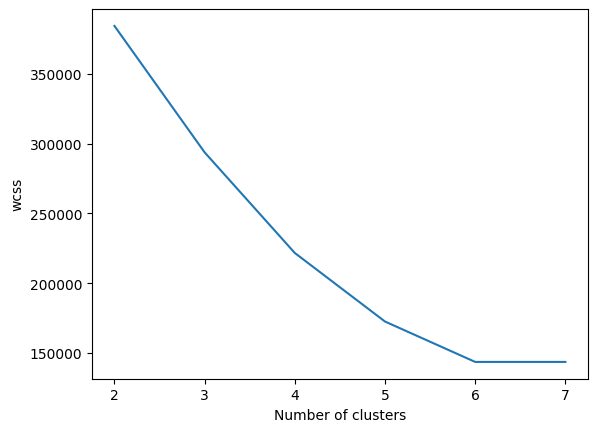

In [23]:
plt.plot(np.arange(2,8),wcss)
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

### Based on the above wcss plot, the elbow cut is at num_clusters = 5

### So the optimal number of clusters to use, with reduced overfitting on the data is k = 5

In [24]:
print(f"Features: {numeric_cols}")

num_clusters = 5
num_iterations = 5
print("Number of clusters:",num_clusters)
print("Number of iterations:",num_iterations)

start = time.time()
kmeans = KMeans(df1[numeric_cols],num_clusters,num_iterations)

kmeans.iterate(df1[numeric_cols])
print("Runtime:",time.time() - start)

Features: ['Genetic_Group', 'Intra_Group_Similarity', 'Inter_Group_Difference']
Number of clusters: 5
Number of iterations: 5
Initialized Centroids: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [0. 1. 0.]]
Iteration: 0
Updating centroids
Datapoints per cluster: [296659, 0, 29884, 0, 35759]
Centroids: [[ 0.09508897  0.         -0.02320509]
 [ 0.          0.          0.        ]
 [ 0.08543033  1.08579842  1.66955562]
 [ 0.          0.          0.        ]
 [ 0.1361056   1.53499818 -0.06236192]]
Iteration: 1
Updating centroids
Datapoints per cluster: [78726, 217933, 26757, 0, 38886]
Centroids: [[ 0.88514595  0.         -0.39129385]
 [-0.19031078  0.          0.10976309]
 [ 0.04993086  0.86814665  1.74731846]
 [ 0.          0.          0.        ]
 [ 0.15645734  1.64863961  0.02340174]]
Iteration: 2
Updating centroids
Datapoints per cluster: [50939, 68348, 21444, 182166, 39405]
Centroids: [[ 1.44941989  0.04197177 -0.01385971]
 [-0.64568093  0.03885995  0.3499883 ]
 [ 0.06472673  0.586

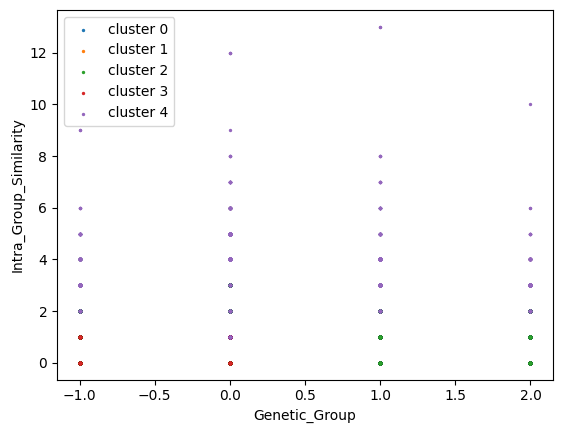

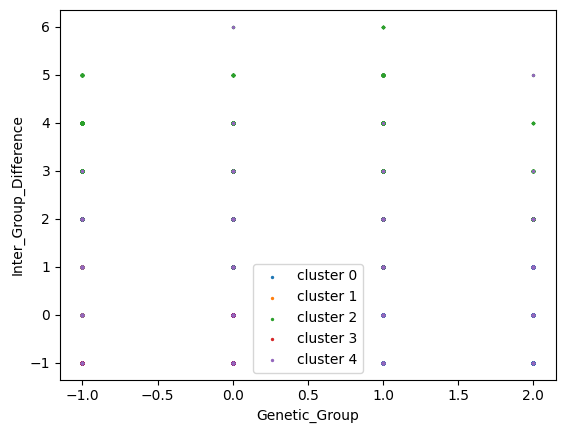

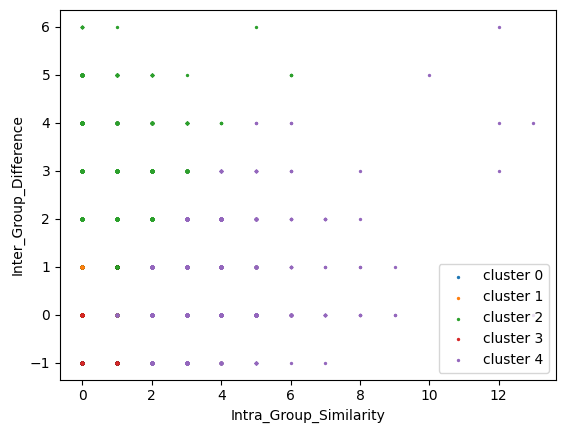

In [25]:
def plot(axis1,axis2):
        for index,cluster in enumerate(kmeans.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(numeric_cols[axis1])
        plt.ylabel(numeric_cols[axis2])
        plt.legend()
        plt.show()

for i in range(len(numeric_cols)-1):
    for j in range(i+1,len(numeric_cols)):
        plot(i,j)

The pairwise plots are giving somewhat distinct clusters

Let's check if we can visualize the clusters more distinctly in 3D plots

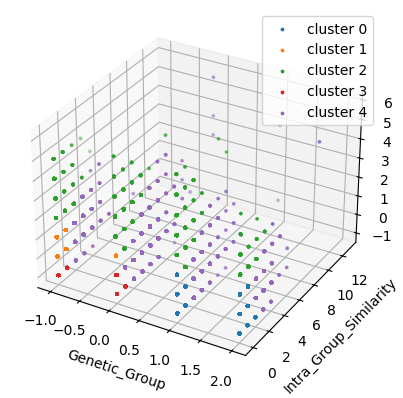

In [26]:

def plot3d(axis1,axis2,axis3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for index,cluster in enumerate(kmeans.clusters):
        cluster_datapoints = pd.DataFrame(cluster)
        ax.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],cluster_datapoints[axis3],s=3,label=f'cluster {index}')
    ax.set_xlabel(numeric_cols[axis1])
    ax.set_ylabel(numeric_cols[axis2])
    ax.set_zlabel(numeric_cols[axis3])
    plt.legend()
    plt.show()

for i in range(len(numeric_cols)-2):
    for j in range(i+1,len(numeric_cols)-1):
        for k in range(j+1,len(numeric_cols)):
            plot3d(i,j,k)

Based on the visualization, 'Inter_Group_Difference', 'Genetic_Group' and 'Intra_Group_Similarity' are able to create clearly defined boundaries for the clusters

In [28]:
print("Number of points in cluster 1:", len(kmeans.clusters[1]))

Number of points in cluster 1: 65110


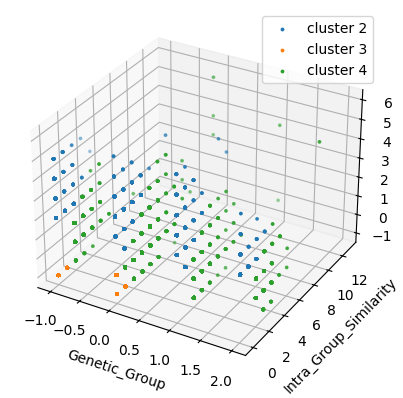

In [29]:

def plot3d(axis1,axis2,axis3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for index,cluster in enumerate(kmeans.clusters[2:]):
        cluster_datapoints = pd.DataFrame(cluster)
        ax.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],cluster_datapoints[axis3],s=3,label=f'cluster {index + 2}')
    ax.set_xlabel(numeric_cols[axis1])
    ax.set_ylabel(numeric_cols[axis2])
    ax.set_zlabel(numeric_cols[axis3])
    plt.legend()
    plt.show()

for i in range(len(numeric_cols)-2):
    for j in range(i+1,len(numeric_cols)-1):
        for k in range(j+1,len(numeric_cols)):
            plot3d(i,j,k)

Cluster 3 seems to be highly concentrated

In [30]:
print("Number of points in cluster 3:", len(kmeans.clusters[3]))

Number of points in cluster 3: 187313


Let's explore what values cluster 1 contains

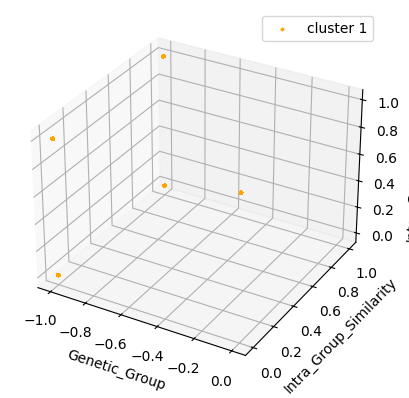

In [49]:

def plot3d(axis1,axis2,axis3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cluster = kmeans.clusters[1]
    cluster_datapoints = pd.DataFrame(cluster)
    ax.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],cluster_datapoints[axis3],s=3,label=f'cluster {1}',color='orange')
    ax.set_xlabel(numeric_cols[axis1])
    ax.set_ylabel(numeric_cols[axis2])
    ax.set_zlabel(numeric_cols[axis3])
    plt.legend()
    plt.show()

for i in range(len(numeric_cols)-2):
    for j in range(i+1,len(numeric_cols)-1):
        for k in range(j+1,len(numeric_cols)):
            plot3d(i,j,k)

Okay cluster 1 also follows fairly different distributions from the clusters 0, 2 and 3, that's good.

There is still significant overlapping between the features when plotted in a 3D space.

#### The cluster we have obtained are visibly different. Clusters 0,1,3 are skewed towards lower values of Intra_Group_Similarity, while clusters 2,4 are more distributed over the first half of the Intra_Group_Similarity values

### Davies Bouldin Score

In [32]:


def davis_bouldin(kmean_obj):
    max_dbs = []
    for i in range(kmeans.num_clusters):
        max_db_i = 0
        # sigma_i is the average disntancs of all points in cluster i from the centroid of cluster i
        sigma_i = np.mean([kmeans.euclidean_distance(datapt,kmeans.centroids[i]) for datapt in kmeans.clusters[i]])
        for j in range(kmeans.num_clusters):
            if j!=i:
                simga_j = np.mean([kmeans.euclidean_distance(datapt,kmeans.centroids[j]) for datapt in kmeans.clusters[j]])
                db  = (sigma_i + simga_j)/kmeans.euclidean_distance(kmeans.centroids[i],kmeans.centroids[j])
                db = db
                if db > max_db_i:
                    max_db_i = db
        max_dbs.append(max_db_i)
    db_score = np.sum(max_dbs)/kmeans.num_clusters
    return db_score
db_score = davis_bouldin(kmeans)
print(f"Davies Bouldin Score: {db_score}")

Davies Bouldin Score: 0.9971632382424269


### 2. Now suppose the comparison done with Genetic_Group is not ordinal. We will use it along with 'Origin' and 'Source_Category' to do clustering with categorical variables 

In [33]:
print("Do all rows in Genetic_Group column have prefix PDS00:",filtered_df['Genetic_Group'].str.startswith('PDS000').all())

categ_cols = ['Origin', 'Source_Category', 'Genetic_Group','Resistance_Profile']

print("Origin:",filtered_df['Origin'].nunique(), type(filtered_df['Origin'].iloc[0]))
print("Source_Category:",filtered_df['Source_Category'].nunique(), type(filtered_df['Source_Category'].iloc[0]))
print("Genetic_Group:",filtered_df['Genetic_Group'].nunique(),type(filtered_df['Genetic_Group'].iloc[0]))

Do all rows in Genetic_Group column have prefix PDS00: True
Origin: 831 <class 'str'>
Source_Category: 2 <class 'str'>
Genetic_Group: 20584 <class 'str'>


Not including Genomic_Data here since the number of unique values of that feature near the total rows of the dataset wiht non Null values, and we're not doing an ordinal comparison with our categorical variables

### I've implemented the following clustering for categorical variables

#### The workflow is the same kmeans, but the euclidean distance is replaced by: if a feature does not have the same value in two datapoints then append 1 to the 'distance' of the datapoints. So more the matches, the lesser the distance

#### Instead of taking the mean as the measure for central tendency in the update subroutine, im using the mode of the categorical features within each cluster to update the centroids

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import time

class KCateg_Matcher():
    def __init__(self,data,num_clusters=4,num_iterations=5):
        self.num_clusters = num_clusters
        self.num_iterations = num_iterations
        self.centroids = [None]*self.num_clusters
        self.clusters = [[] for i in range(self.num_clusters)]
        self.converged = False
    
    def random_centroids(self,data):
        self.centroids = data.sample(n=self.num_clusters,random_state=1)
        self.centroids = self.centroids.values
    
    def matcher_distance(self,datapt1,datapt2):
        dist = 0
        for feature_index in range(len(categ_cols)):
            if datapt1[feature_index] != datapt2[feature_index]:
                dist += 1
        return dist

    def assign(self,data):
        # clear all clusters before reassigning the points:
        self.clusters = [[] for clst in range(self.num_clusters)]

        # find the closest cluster centroid for each datapoint and assign it that cluster
        for datapt in data.values:
            # compute distance from each cluster centroid
            distances = np.array([self.matcher_distance(datapt,centroid) for centroid in self.centroids])
            # assign the datapoint the cluster with the nearest centroid
            self.clusters[np.argmin(distances)].append(datapt)

    def update(self,data):
        print("Updating centroids")
        # update the centroids for each cluster
        for index,cluster in enumerate(self.clusters):
            if len(cluster) != 0:
                # update the centroids as the mean of each feature within the cluster
                zip_cluster = list(zip(*cluster))
                self.centroids[index] = [statistics.mode(list(feature_col)) for feature_col in  zip_cluster]
        # find the closest cluster datapoint to the mean of the cluster and update the cluster centroid with that datapoint
        # for index,cluster in enumerate(self.clusters):
        #     if len(cluster) != 0:
        #         min_dst_datapt_index = np.argmin([self.matcher_distance(self.centroids[index],datapt) for datapt in cluster])
        #         self.centroids[index] = cluster[min_dst_datapt_index]
    
    def iterate(self,data):
        self.random_centroids(data)
        print(f"Initialized Centroids: {self.centroids}")
        for i in range(self.num_iterations):
            print(f"Iteration: {i}")
            self.assign(data)
            self.update(data)
            print("Datapoints per cluster:",[len(cluster) for cluster in self.clusters])
            print("Centroids:",self.centroids)

    def plot(self,axis1,axis2):
        for index,cluster in enumerate(self.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(numeric_cols[axis1])
        plt.ylabel(numeric_cols[axis2])
        plt.legend()
        plt.show()
    
    def wcss(self,data):
        wcss = 0
        for index, cluster in enumerate(self.clusters):
            wcss += np.sum([np.square(self.matcher_distance(datapt,self.centroids[index])) for datapt in cluster])
        return wcss

print(f"Features: {categ_cols}")
print("Total datapoints:",filtered_df.shape[0])

num_clusters = 4
num_iterations = 5
print("Number of clusters:",num_clusters)
print("Number of iterations:",num_iterations)

start = time.time()
kmeans_matcher = KCateg_Matcher(filtered_df[categ_cols],num_clusters,num_iterations)

kmeans_matcher.iterate(filtered_df[categ_cols])
print("Runtime:",time.time() - start)

Features: ['Origin', 'Source_Category', 'Genetic_Group', 'Resistance_Profile']
Total datapoints: 362302
Number of clusters: 4
Number of iterations: 5
Initialized Centroids: [['USA' 'clinical' 'PDS000012071.371' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000032598.101'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000031660.8' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:CA' 'Ecological_Sample' 'PDS000029532.146'
  'mdsA=COMPLETE,mdsB=PARTIAL_END_OF_CONTIG']]
Iteration: 0
Updating centroids
Datapoints per cluster: [301332, 5596, 19, 55355]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000028037.303'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:NC' 'Ecological_Sample' 'PDS000031660.8'
  'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:CA' 'Ecological_Sample' 'PDS000089910.460'
  "aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,tet(B)=COMPLETE"]]
Iteration: 1
Updating centroids
Datapoint

In [35]:
klist = [centroid for centroid in kmeans_matcher.centroids]
klist[0][0]

'USA'

In [36]:
import statistics

zip_list_init = [[1,2,3],[1,2,3],[1,2,3],[1,2,3]]
zip_list =zip(*zip_list_init)
zip_list = list(zip_list)
print(zip_list,type(zip_list))
mode_list = [statistics.mode(list(feature_col)) for feature_col in zip_list]
print(mode_list)

[(1, 1, 1, 1), (2, 2, 2, 2), (3, 3, 3, 3)] <class 'list'>
[1, 2, 3]


### Computing the optimal number of clusters using the elbow method:

In [37]:
print(f"Features: {categ_cols}")


num_iterations = 5
wcss = []
for num_clusters in range(2,8):
    print("Number of clusters:",num_clusters)
    print("Number of iterations:",num_iterations)
    start = time.time()
    kmeans_matcher = KCateg_Matcher(filtered_df[categ_cols],num_clusters=num_clusters,num_iterations=num_iterations)
    kmeans_matcher.iterate(data=filtered_df[categ_cols])
    print("Runtime:",time.time() - start)
    wcss += [kmeans_matcher.wcss(filtered_df[categ_cols])]


Features: ['Origin', 'Source_Category', 'Genetic_Group', 'Resistance_Profile']
Number of clusters: 2
Number of iterations: 5
Initialized Centroids: [['USA' 'clinical' 'PDS000012071.371' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000032598.101'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 0
Updating centroids
Datapoints per cluster: [356301, 6001]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'Ecological_Sample' 'PDS000028037.303'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 1
Updating centroids
Datapoints per cluster: [308125, 54177]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:CA' 'Ecological_Sample' 'PDS000089910.460'
  "aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,tet(B)=COMPLETE"]]
Iteration: 2
Updating centroids
Datapoints per cluster: [305070, 57232]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:

elbow cut plot for determining the optimal number of clusters

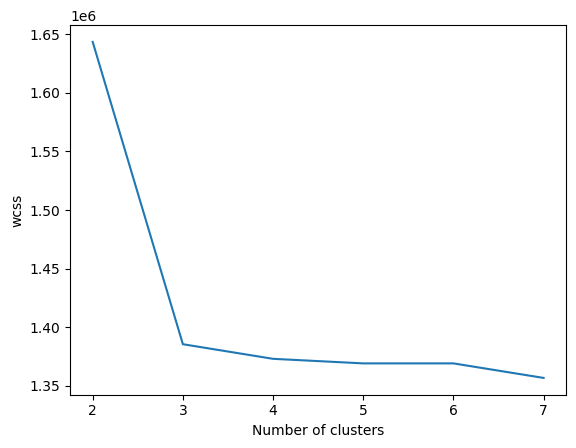

In [38]:
plt.plot(np.arange(2,8),wcss)
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

### Based on the above wcss plot, the elbow cut is at num_clusters = 3

### So the optimal number of clusters to use, with reduced overfitting on the data is k = 3

In [39]:
print(f"Features: {categ_cols}")

num_clusters = 3
num_iterations = 5
print("Number of clusters:",num_clusters)
print("Number of iterations:",num_iterations)

start = time.time()
kmeans_matcher = KCateg_Matcher(filtered_df[categ_cols],num_clusters,num_iterations)

kmeans_matcher.iterate(filtered_df[categ_cols])
print("Runtime:",time.time() - start)

Features: ['Origin', 'Source_Category', 'Genetic_Group', 'Resistance_Profile']
Number of clusters: 3
Number of iterations: 5
Initialized Centroids: [['USA' 'clinical' 'PDS000012071.371' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000032598.101'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'clinical' 'PDS000031660.8' 'mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 0
Updating centroids
Datapoints per cluster: [356282, 6001, 19]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'Ecological_Sample' 'PDS000028037.303'
  'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:NC' 'Ecological_Sample' 'PDS000031660.8'
  'mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 1
Updating centroids
Datapoints per cluster: [256981, 51681, 53640]
Centroids: [['USA' 'clinical' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:CA' 'Ecological_Sample' 'PDS000089910.460'
  "aph(3'')-Ib=COMPLETE,aph(6)-Id=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE,tet(B)=COMPLETE"]
 

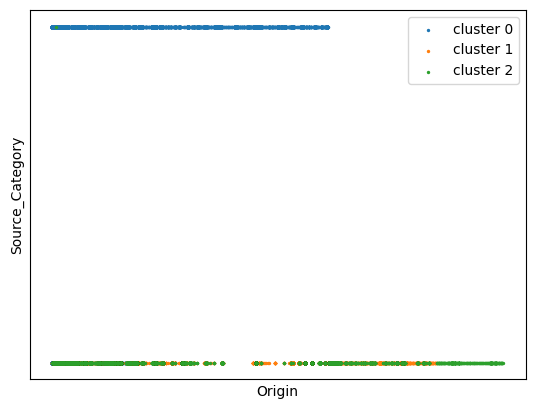

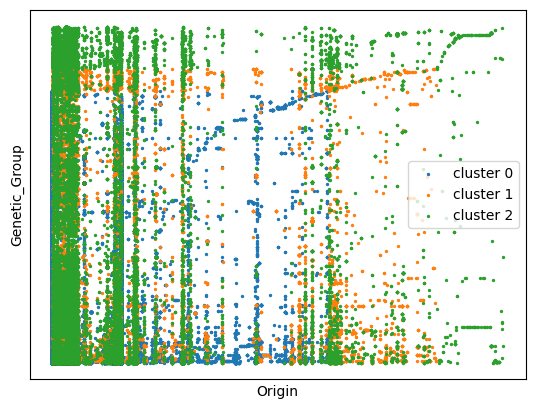

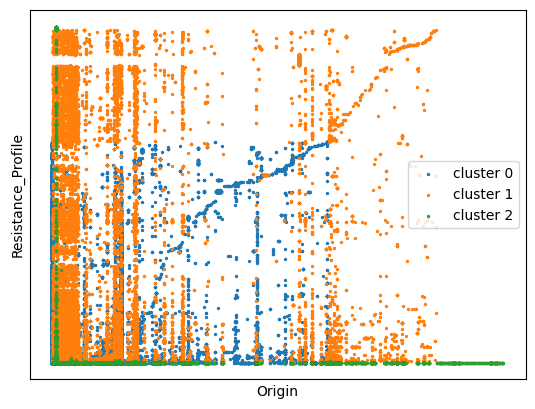

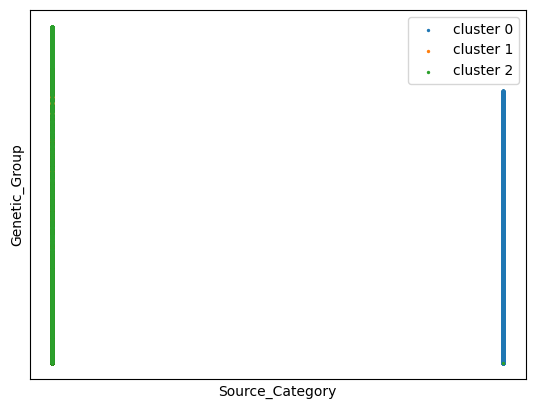

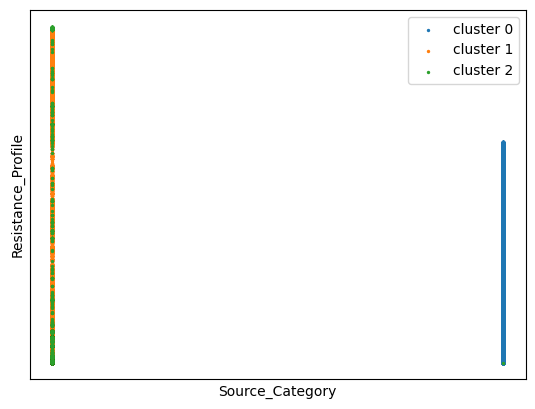

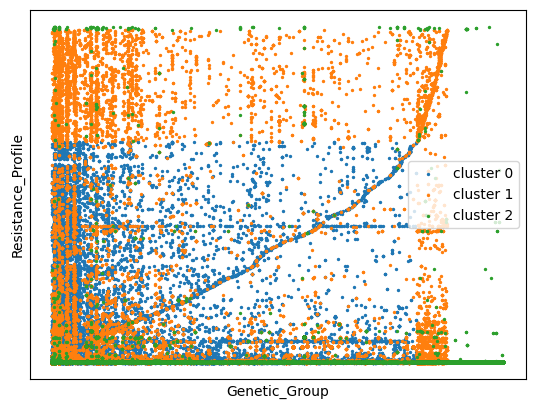

In [40]:
def plot(axis1,axis2):
        for index,cluster in enumerate(kmeans_matcher.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(categ_cols[axis1])
        plt.ylabel(categ_cols[axis2])
        plt.xticks([])
        plt.yticks([])
        plt.legend()
        plt.show()

for i in range(len(categ_cols)-1):
    for j in range(i+1,len(categ_cols)):
        plot(i,j)

#### 'Origin' and 'Resistance_Profile' seem to give a small amount of bucketing, 'Source_Category' is doing decent amount of bucketing but it has a lot of overlaps between cluster 1 and 2 which cant be visualized in a 2d plot

Let's check if we get more distinct clusters in a 3D plot

['Origin', 'Source_Category', 'Genetic_Group', 'Resistance_Profile']


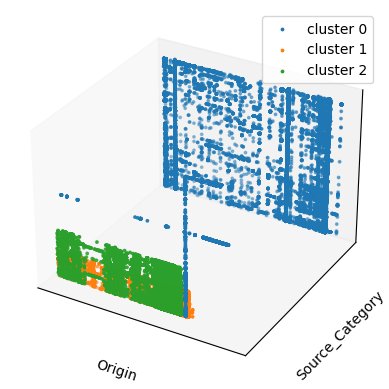

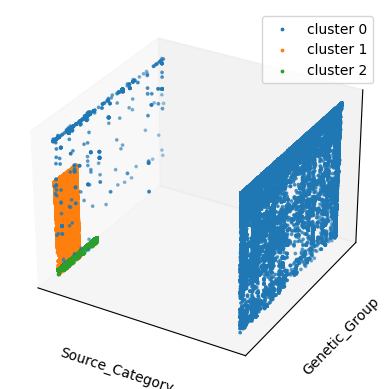

In [41]:

def plot3d(axis1,axis2,axis3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for index,cluster in enumerate(kmeans_matcher.clusters):
        cluster_datapoints = pd.DataFrame(cluster)
        x_vals = cluster_datapoints[axis1].astype('category').cat.codes
        y_vals = cluster_datapoints[axis2].astype('category').cat.codes
        z_vals = cluster_datapoints[axis3].astype('category').cat.codes
        ax.scatter(x_vals, y_vals, z_vals, s=3, label=f'cluster {index}')
    ax.set_xlabel(categ_cols[axis1])
    ax.set_ylabel(categ_cols[axis2])
    ax.set_zlabel(categ_cols[axis3])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.legend()
    plt.show()
print(categ_cols)
plot3d(0,1,2)
plot3d(1,2,3)

#### This does give us three distinct clusters. Cluster 0 is concentrated in one value of 'Source_Category', while clusters 1 and 2 are with the othr value of 'Source_Category' and are distributed well by 'Genetic_Group' and 'Resistance_Profile' values

### Davies Bouldin Score

In [42]:

def davis_bouldin(kmean_obj):
    max_dbs = []
    for i in range(kmean_obj.num_clusters):
        max_db_i = 0
        # sigma_i is the average disntancs of all points in cluster i from the centroid of cluster i
        sigma_i = np.mean([kmean_obj.matcher_distance(datapt,kmean_obj.centroids[i]) for datapt in kmean_obj.clusters[i]])
        for j in range(kmean_obj.num_clusters):
            if j!=i:
                simga_j = np.mean([kmean_obj.matcher_distance(datapt,kmean_obj.centroids[j]) for datapt in kmean_obj.clusters[j]])
                db  = (sigma_i + simga_j)/kmean_obj.matcher_distance(kmean_obj.centroids[i],kmean_obj.centroids[j])
                db = db
                if db > max_db_i:
                    max_db_i = db
        max_dbs.append(max_db_i)
    db_score = np.sum(max_dbs)/kmean_obj.num_clusters
    return db_score
db_score = davis_bouldin(kmeans_matcher)
print(f"Davies Bouldin Score: {db_score}")

Davies Bouldin Score: 1.403734561763792


#### Let's check if we get meaningful clustering after removing 'Source_Category' (to see how much did 'source_category' influence the clustering)

##### Computing the optimal number of clusters using the elbow method:

In [50]:
class KCateg_Matcher():
    def __init__(self,data,num_clusters=4,num_iterations=5):
        self.num_clusters = num_clusters
        self.num_iterations = num_iterations
        self.centroids = [None]*self.num_clusters
        self.clusters = [[] for i in range(self.num_clusters)]
        self.converged = False
    
    def random_centroids(self,data):
        self.centroids = data.sample(n=self.num_clusters,random_state=1)
        self.centroids = self.centroids.values
    
    def matcher_distance(self,datapt1,datapt2):
        dist = 0
        for feature_index in range(len(rem_srccateg)):
            if datapt1[feature_index] != datapt2[feature_index]:
                dist += 1
        return dist

    def assign(self,data):
        # clear all clusters before reassigning the points:
        self.clusters = [[] for clst in range(self.num_clusters)]

        # find the closest cluster centroid for each datapoint and assign it that cluster
        for datapt in data.values:
            # compute distance from each cluster centroid
            distances = np.array([self.matcher_distance(datapt,centroid) for centroid in self.centroids])
            # assign the datapoint the cluster with the nearest centroid
            self.clusters[np.argmin(distances)].append(datapt)

    def update(self,data):
        print("Updating centroids")
        # update the centroids for each cluster
        for index,cluster in enumerate(self.clusters):
            if len(cluster) != 0:
                # update the centroids as the mean of each feature within the cluster
                zip_cluster = list(zip(*cluster))
                self.centroids[index] = [statistics.mode(list(feature_col)) for feature_col in  zip_cluster]
        # find the closest cluster datapoint to the mean of the cluster and update the cluster centroid with that datapoint
        # for index,cluster in enumerate(self.clusters):
        #     if len(cluster) != 0:
        #         min_dst_datapt_index = np.argmin([self.matcher_distance(self.centroids[index],datapt) for datapt in cluster])
        #         self.centroids[index] = cluster[min_dst_datapt_index]
    
    def iterate(self,data):
        self.random_centroids(data)
        print(f"Initialized Centroids: {self.centroids}")
        for i in range(self.num_iterations):
            print(f"Iteration: {i}")
            self.assign(data)
            self.update(data)
            print("Datapoints per cluster:",[len(cluster) for cluster in self.clusters])
            print("Centroids:",self.centroids)

    def plot(self,axis1,axis2):
        for index,cluster in enumerate(self.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(numeric_cols[axis1])
        plt.ylabel(numeric_cols[axis2])
        plt.legend()
        plt.show()
    
    def wcss(self,data):
        wcss = 0
        for index, cluster in enumerate(self.clusters):
            wcss += np.sum([np.square(self.matcher_distance(datapt,self.centroids[index])) for datapt in cluster])
        return wcss



rem_srccateg = categ_cols.copy()
rem_srccateg.remove('Source_Category')


print(f"Features: {rem_srccateg}")


num_iterations = 5
wcss = []
for num_clusters in range(2,8):
    print("Number of clusters:",num_clusters)
    print("Number of iterations:",num_iterations)
    start = time.time()
    kmeans_matcher = KCateg_Matcher(filtered_df[rem_srccateg],num_clusters=num_clusters,num_iterations=num_iterations)
    kmeans_matcher.iterate(data=filtered_df[rem_srccateg])
    print("Runtime:",time.time() - start)
    wcss += [kmeans_matcher.wcss(filtered_df[rem_srccateg])]


Features: ['Origin', 'Genetic_Group', 'Resistance_Profile']
Number of clusters: 2
Number of iterations: 5
Initialized Centroids: [['USA' 'PDS000012071.371' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000032598.101' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 0
Updating centroids
Datapoints per cluster: [356301, 6001]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000028037.303' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 1
Updating centroids
Datapoints per cluster: [356251, 6051]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000028037.303' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 2
Updating centroids
Datapoints per cluster: [356251, 6051]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000028037.303' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 3
Updating centroids
Datapoints per cluster: [356251, 6051]
Centroids: [['USA' 'PDS0000657

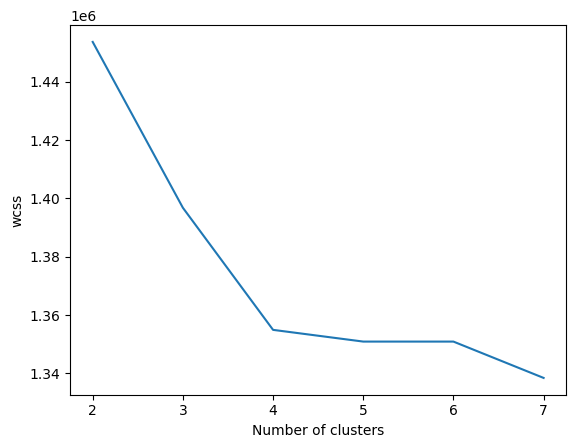

In [51]:
plt.plot(np.arange(2,8),wcss)
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

### Based on the above wcss plot, the elbow cut is at num_clusters = 4

### So the optimal number of clusters to use, with reduced overfitting on the data is k = 4

In [52]:
print(f"Features: {rem_srccateg}")

num_clusters = 3
num_iterations = 5
print("Number of clusters:",num_clusters)
print("Number of iterations:",num_iterations)

start = time.time()
kmeans_matcher = KCateg_Matcher(filtered_df[rem_srccateg],num_clusters,num_iterations)

kmeans_matcher.iterate(filtered_df[rem_srccateg])
print("Runtime:",time.time() - start)

Features: ['Origin', 'Genetic_Group', 'Resistance_Profile']
Number of clusters: 3
Number of iterations: 5
Initialized Centroids: [['USA' 'PDS000012071.371' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000032598.101' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000031660.8' 'mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 0
Updating centroids
Datapoints per cluster: [356282, 6001, 19]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000028037.303' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:NC' 'PDS000031660.8' 'mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 1
Updating centroids
Datapoints per cluster: [352113, 6051, 4138]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA' 'PDS000028037.303' 'fosA7=PARTIAL,mdsA=COMPLETE,mdsB=COMPLETE']
 ['USA:NC' 'PDS000089910.460' 'mdsA=COMPLETE,mdsB=COMPLETE']]
Iteration: 2
Updating centroids
Datapoints per cluster: [344662, 6051, 11589]
Centroids: [['USA' 'PDS000065758.734' 'mdsA=COMPLE

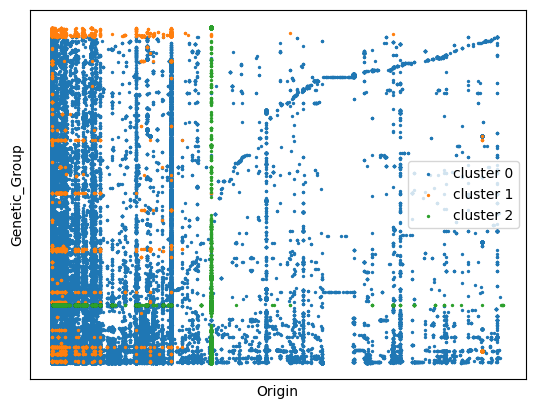

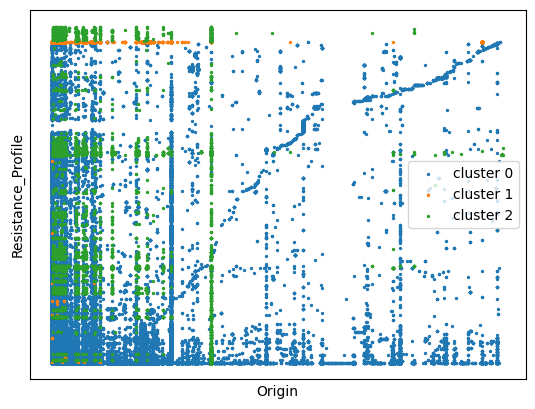

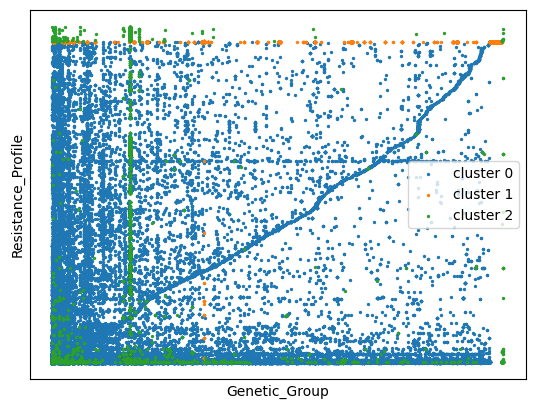

In [53]:
def plot(axis1,axis2):
        for index,cluster in enumerate(kmeans_matcher.clusters):
            cluster_datapoints = pd.DataFrame(cluster)
            plt.scatter(cluster_datapoints[axis1],cluster_datapoints[axis2],s=2,label=f'cluster {index}')
        plt.xlabel(rem_srccateg[axis1])
        plt.ylabel(rem_srccateg[axis2])
        plt.xticks([])
        plt.yticks([])
        plt.legend()
        plt.show()

for i in range(len(rem_srccateg)-1):
    for j in range(i+1,len(rem_srccateg)):
        plot(i,j)

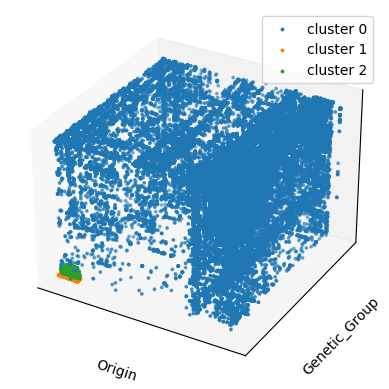

In [54]:

def plot3d(axis1,axis2,axis3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for index,cluster in enumerate(kmeans_matcher.clusters):
        cluster_datapoints = pd.DataFrame(cluster)
        x_vals = cluster_datapoints[axis1].astype('category').cat.codes
        y_vals = cluster_datapoints[axis2].astype('category').cat.codes
        z_vals = cluster_datapoints[axis3].astype('category').cat.codes
        ax.scatter(x_vals, y_vals, z_vals, s=3, label=f'cluster {index}')
    ax.set_xlabel(rem_srccateg[axis1])
    ax.set_ylabel(rem_srccateg[axis2])
    ax.set_zlabel(rem_srccateg[axis3])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.legend()
    plt.show()
plot3d(0,1,2)

#### Cluster 0 is distributed all over space, while clusters 1 and 2 are concentrated in a range of values for 'Origin' and 'Genetic_Group'. Hence, the clustering with 'Source_Category' gives more meaningful clusters

### Davies Bouldin Score

In [56]:

def davis_bouldin(kmean_obj):
    max_dbs = []
    for i in range(kmean_obj.num_clusters):
        max_db_i = 0
        # sigma_i is the average disntancs of all points in cluster i from the centroid of cluster i
        sigma_i = np.mean([kmean_obj.matcher_distance(datapt,kmean_obj.centroids[i]) for datapt in kmean_obj.clusters[i]])
        for j in range(kmean_obj.num_clusters):
            if j!=i:
                simga_j = np.mean([kmean_obj.matcher_distance(datapt,kmean_obj.centroids[j]) for datapt in kmean_obj.clusters[j]])
                db  = (sigma_i + simga_j)/kmean_obj.matcher_distance(kmean_obj.centroids[i],kmean_obj.centroids[j])
                db = db
                if db > max_db_i:
                    max_db_i = db
        max_dbs.append(max_db_i)
    db_score = np.sum(max_dbs)/kmean_obj.num_clusters
    return db_score
db_score = davis_bouldin(kmeans_matcher)
print(f"Davies Bouldin Score: {db_score}")

Davies Bouldin Score: 1.7507256784941034


### So overall best clustering was achieved with the numerical features, then with the categorical features including 'Source_Category'